In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/mwardeh-png/Intro-to-ML/main/diabetes.csv"
dataset = pd.read_csv(url)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<b>Pre-processing

In [5]:
x = dataset.iloc[:,:8].values
y = dataset.iloc[:,8].values

x =  StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

<b>Logistic Regression

In [7]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

<b>Model Evaluation and Plotting

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

[[98  9]
 [18 29]]


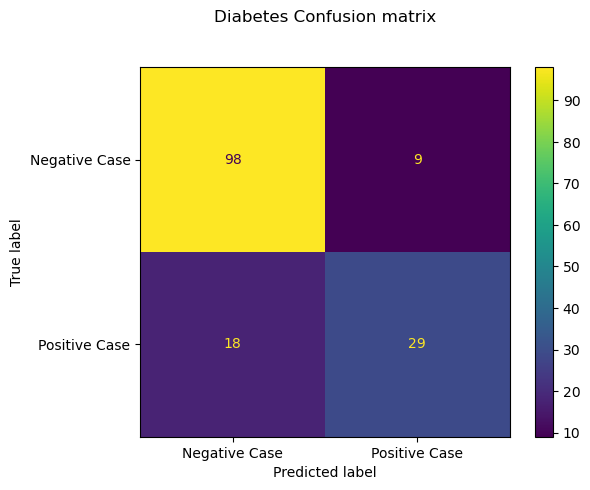

In [164]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Negative Case", "Positive Case"])


disp.plot()
plt.title('Diabetes Confusion matrix', y=1.1)
plt.show()
# fig, ax = plt.subplots()
# class_names = ["Negative Case", "Positive Case"]
# sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap ="viridis",fmt='g')

# ax.xaxis.set_label_position("top")
# ax.set_xticklabels(class_names)
# ax.set_yticklabels(class_names)
# plt.tight_layout()
# plt.title('Diabetes Confusion matrix', y=1.1)
# plt.ylabel('Actual Result')
# plt.xlabel('Predicted Result')